## Air Quality Dashboard
This notebook shows how to use IPython Widgets to display the air quality using Grove Sensors.

The dashboard can be run with the code cells hidden by using **`jupyter_dashboards`**. You can install and enable it with the following commands:

`pip install jupyter_dashboards`

`jupyter dashboards quick-setup --sys-prefix`

You can show the full notebook again using the View Menu -> Notebook

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
import collect_air_data
import time
from datetime import datetime
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox

air_data = collect_air_data.collect_air_object()
#Manage relative values of PMS here
pms_ref_0_3 = air_data.pms_ref_0_3
pms_ref_0_5 = air_data.pms_ref_0_5
pms_ref_1_0 = air_data.pms_ref_1_0

In [2]:
#This cell make sure the bme680 is heated up
while True:
    if air_data.bme_680.get_sensor_data():
        output = '{0:.2f} C,{1:.2f} hPa,{2:.2f} %RH'.format(
            air_data.bme_680.data.temperature,
            air_data.bme_680.data.pressure,
            air_data.bme_680.data.humidity)
        #Only print gas data if the heater is stable
        if air_data.bme_680.data.heat_stable:
            print('{0},{1} Ohms'.format(
                output,
                air_data.bme_680.data.gas_resistance))
            break
        else:
            print(output)
    time.sleep(1)

28.03 C,1012.03 hPa,36.71 %RH
28.03 C,1012.02 hPa,36.74 %RH
28.04 C,1012.03 hPa,36.75 %RH
28.05 C,1012.00 hPa,36.76 %RH
28.07 C,1011.99 hPa,36.73 %RH,20032.551409759995 Ohms


In [3]:
button = widgets.Button(description='Reset Values to 1')
def on_button_clicked(_):
    air_data.reset_ref_values()
    #Reset all the reference values to their current value
    pms5003_data = air_data.pms5003.read()
    pms_ref_0_3 = pms5003_data.pm_per_1l_air(0.3)
    pms_ref_0_5 = pms5003_data.pm_per_1l_air(0.5)
    pms_ref_1_0 = pms5003_data.pm_per_1l_air(1.0)
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button
button

A Jupyter Widget

In [4]:
df = pd.DataFrame() #Create an empty data frame to append to later
clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
clean_data_table['Analog Temperature (oC)'] = [air_data.analog_temp()]
clean_data_table['Analog VOC in Air'] = [air_data.analog_voc_ratio()]
clean_data_table['Analog Alcohol in Air'] = [air_data.analog_alcohol_ratio()]
bme_680_latest = air_data.bme_680.get_sensor_data()
clean_data_table['Digital Temperature (oC)'] = [bme_680_latest.temperature]
clean_data_table['Air Pressure (hPa)'] = [bme_680_latest.pressure]
clean_data_table['BM680 VOC'] = [bme_680_latest.gas_rel]
clean_data_table['Humidity %'] = [bme_680_latest.humidity]
clean_data_table['GM102B VOC'] = [air_data.GM102B_ratio()]
clean_data_table['GM302B VOC'] = [air_data.GM302B_ratio()]
clean_data_table['GM502B VOC'] = [air_data.GM502B_ratio()]
clean_data_table['GM702B VOC'] = [air_data.GM702B_ratio()]
pms5003_data = air_data.pms5003.read()
clean_data_table['0.3um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.3)]
clean_data_table['0.5um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.5)]
clean_data_table['1.0um in 0.1L air'] = [pms5003_data.pm_per_1l_air(1.0)]

df = df.append(clean_data_table, ignore_index = True)
    
voc_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['Analog VOC in Air'],
    min=0,
    max=5.0,
    description='Analog VOC:',
    bar_style='info',
    style={'bar_color': '#fcdb03'},
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

humidity_slider = widgets.FloatSlider(
    value=df.iloc[-1]['Humidity %'],
    min=0,
    max=100.0,
    step=0.1,
    description='Humidity %:',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

bm680_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['BM680 VOC'],
    min=0,
    max=4.0,
    description='BM680 VOC:',
    bar_style='info',
    style={'bar_color': '#4ba329'},
    orientation='horizontal'
)

temp_slider = widgets.FloatSlider(
    value=df.iloc[-1]['Analog Temperature (oC)'],
    min=0,
    max=36.0,
    step=0.1,
    description='A Temp (oC):',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
alcohol_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['Analog Alcohol in Air'],
    min=0,
    max=4.0,
    description='An. Alcohol:',
    bar_style='info',
    style={'bar_color': '#69fffc'},
    orientation='horizontal'
)

d_temp_slider = widgets.FloatSlider(
    value=df.iloc[-1]['Digital Temperature (oC)'],
    min=0,
    max=36.0,
    step=0.1,
    description='D Temp (oC):',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

gm102b_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['GM102B VOC'],
    min=0,
    max=4.0,
    description='GM102B:',
    bar_style='info',
    style={'bar_color': '#4278f5'},
    orientation='horizontal'
)

zero_3_um_slider = widgets.FloatSlider(
    value=df.iloc[-1]['0.3um in 0.1L air'],
    min=0,
    max=1000.0,
    step=0.1,
    description='0.3um Part.:',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

gm302b_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['GM302B VOC'],
    min=0,
    max=4.0,
    description='GM302B:',
    bar_style='info',
    style={'bar_color': '#42a4f5'},
    orientation='horizontal'
)

zero_5_um_slider = widgets.FloatSlider(
    value=df.iloc[-1]['0.5um in 0.1L air'],
    min=0,
    max=1000.0,
    step=0.1,
    description='0.5um Part.:',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

gm502b_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['GM502B VOC'],
    min=0,
    max=4.0,
    description='GM502B:',
    bar_style='info',
    style={'bar_color': '#42bcf5'},
    orientation='horizontal'
)

one_um_slider = widgets.FloatSlider(
    value=df.iloc[-1]['1.0um in 0.1L air'],
    min=0,
    max=1000.0,
    step=0.1,
    description='1.0um Part.:',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

gm702b_bar = widgets.widgets.FloatProgress(
    value=df.iloc[-1]['GM702B VOC'],
    min=0,
    max=5.0,
    description='GM702B:',
    bar_style='info',
    style={'bar_color': '#42d4f5'},
    orientation='horizontal'
)

pressure_slider = widgets.FloatSlider(
    value=df.iloc[-1]['Air Pressure (hPa)'],
    min=0,
    max=1200.0,
    step=0.1,
    description='Press. (hPa):',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

<IPython.core.display.Javascript object>


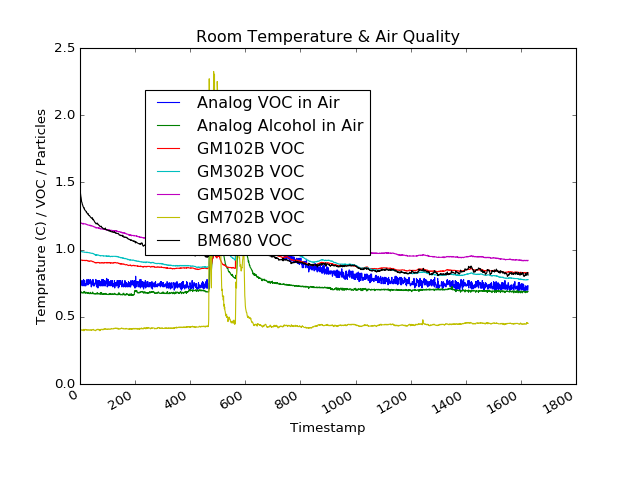

A Jupyter Widget

In [8]:
df = pd.DataFrame() #Create an empty data frame to append to later
def animate(i):
    global df
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    clean_data_table['Analog Temperature (oC)'] = [air_data.analog_temp()]
    clean_data_table['Analog VOC in Air'] = [air_data.analog_voc_ratio()]
    clean_data_table['Analog Alcohol in Air'] = [air_data.analog_alcohol_ratio()]
    clean_data_table['GM102B VOC'] = [air_data.GM102B_ratio()]
    clean_data_table['GM302B VOC'] = [air_data.GM302B_ratio()]
    clean_data_table['GM502B VOC'] = [air_data.GM502B_ratio()]
    clean_data_table['GM702B VOC'] = [air_data.GM702B_ratio()]
    bme_680_latest = air_data.bme_680.get_sensor_data()
    clean_data_table['Digital Temperature (oC)'] = [bme_680_latest.temperature]
    clean_data_table['Air Pressure (hPa)'] = [bme_680_latest.pressure]
    clean_data_table['Humidity %'] = [bme_680_latest.humidity]
    if bme_680_latest.heat_stable:
        clean_data_table['BM680 VOC'] = [bme_680_latest.gas_rel]
    
    #Particle sensor not plotted for this example
    pms5003_data = air_data.pms5003.read()
    clean_data_table['0.3um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.3)]
    clean_data_table['0.5um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.5)]
    clean_data_table['1.0um in 0.1L air'] = [pms5003_data.pm_per_1l_air(1.0)]
    df = df.append(clean_data_table, ignore_index = True)
    df.index.name = 'timestamp'
    
    voc_bar.value = df.iloc[-1]['Analog VOC in Air']
    humidity_slider.value = df.iloc[-1]['Humidity %']
    bm680_bar.value = df.iloc[-1]['BM680 VOC']
    temp_slider.value = df.iloc[-1]['Analog Temperature (oC)']
    alcohol_bar.value = df.iloc[-1]['Analog Alcohol in Air']
    d_temp_slider.value = df.iloc[-1]['Digital Temperature (oC)']
    gm102b_bar.value = df.iloc[-1]['GM102B VOC']
    gm302b_bar.value = df.iloc[-1]['GM302B VOC']
    gm502b_bar.value = df.iloc[-1]['GM502B VOC']
    gm702b_bar.value = df.iloc[-1]['GM702B VOC']
    zero_3_um_slider.value = df.iloc[-1]['0.3um in 0.1L air']
    zero_5_um_slider.value = df.iloc[-1]['0.5um in 0.1L air']
    one_um_slider.value = df.iloc[-1]['1.0um in 0.1L air']
    pressure_slider.value = df.iloc[-1]['Air Pressure (hPa)']
    
    x = df.index
    y1 = df['Analog VOC in Air']
    y2 = df['Analog Alcohol in Air']
    y3 = df['GM102B VOC']
    y4 = df['GM302B VOC']
    y5 = df['GM502B VOC']
    y6 = df['GM702B VOC']
    y7 = df['BM680 VOC']
    
#    y8 = df['0.3um in 0.1L air']
#    y9 = df['0.5um in 0.1L air']
#    y10 = df['1.0um in 0.1L air']
    
    plt.cla()
    plt.plot(x,y1,label='Analog VOC in Air')
    plt.plot(x,y2,label='Analog Alcohol in Air')
    plt.plot(x,y3,label='GM102B VOC')
    plt.plot(x,y4,label='GM302B VOC')
    plt.plot(x,y5,label='GM502B VOC')
    plt.plot(x,y6,label='GM702B VOC')
    plt.plot(x,y7,label='BM680 VOC')
#    plt.plot(x,y8,label='0.3um in 0.1L air')
#    plt.plot(x,y9,label='0.5um in 0.1L air')
#    plt.plot(x,y10,label='1.0um in 0.1L air')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Temprature (C) / VOC / Particles')
    plt.title("Room Temperature & Air Quality")
    plt.gcf().autofmt_xdate()
    plt.ticklabel_format(useOffset=False,axis='y')
    plt.legend(bbox_to_anchor=(0.6, 0.9))
    plt.show()
    
ani = FuncAnimation(plt.gcf(), animate,interval=2000)
plt.show()

first_box = HBox([voc_bar, humidity_slider])
second_box = HBox([bm680_bar, temp_slider])
third_box = HBox([alcohol_bar, d_temp_slider])
fourth_box = HBox([gm102b_bar, zero_3_um_slider])
fifth_box = HBox([gm302b_bar, zero_5_um_slider])
sixth_box = HBox([gm502b_bar, one_um_slider])
seventh_box = HBox([gm702b_bar, pressure_slider])
VBox([first_box, second_box, third_box, fourth_box, fifth_box,sixth_box, seventh_box])

In [6]:
#Show the last row of the data table
df.tail(1)

""


In [7]:
#Save the data frame to a CSV file
df.index.name = 'timestamp'
filename = "CSV-Data/Vicks_" + str(datetime.now()) + ".csv"
df.to_csv(filename)